## Text Cleaning

In [1]:
import os
import re
import pandas as pd
import random
import nltk


import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


nltk.download('stopwords')
from nltk.corpus import stopwords


from nltk.stem import PorterStemmer
from nltk import word_tokenize



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/noahlyford/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#Series of regular expressions to take out headers, email addresses, etc..
def clean_text(text):
    text = text.lower()
    text = re.sub(r'(newsgroups:\s+[^\n]+\n)', '', text)
    text = re.sub(r'(path:\s+[^\n]+\n)', '', text)
    text = re.sub(r'(in-reply-to:\s+[^\n]+\n)', '', text)
    text = re.sub(r'(followup-to:\s+[^\n]+\n)', '', text)
    text = re.sub(r'(reply-to:\s+[^\n]+\n)', '', text)
    text = re.sub(r'(x-newsreader:\s+[^\n]+\n)', '', text)
    
    
    text = re.sub(r'(message-id:\s+[^\n]+\n)', '', text)
    text = re.sub(r'(sender:\s+[^\n]+\n)', '', text)
    text = re.sub(r'(nnntp-posting-host:\s+[^\n]+\n)', '', text)
    text = re.sub(r'(organization:\s+[^\n]+\n)', '', text)
    text = re.sub(r'(date:\s+[^\n]+\n)', '', text)
    text = re.sub(r'(disclaimer:\s+[^\n]+\n)', '', text)
    text = re.sub(r'(x-mailer:\s+[^\n]+\n)', '', text)
    text = re.sub(r'(xref:\s+[^\n]+\n)', '', text)
    text = re.sub(r'(article-i.d.:\s+[^\n]+\n)', '', text)
    text = re.sub(r'(keywords:\s+[^\n]+\n)', '', text)
    text = re.sub(r'(x-received:\s+[^\n]+\n)', '', text)
    text = re.sub(r'(in article\s+[^\n]+\n)', '', text)
    text = re.sub(r'(approved:\s+[^\n]+\n)', '', text)
    
    
    
    text = re.sub(r'(nntp-posting-host:\s+[^\n]+\n)', '', text)
    text = re.sub(r'(lines:\s+[^\n]+\n)', '', text)
    text = re.sub(r'(date:\s+[^\n]+\n)', '', text)
    text = re.sub(r'(from:\s+[^\n]+\n)', '', text)
    text = re.sub(r'(distribution:\s+[^\n]+\n)', '', text)
    text = re.sub(r'(references:\s+[^\n]+\n)', '', text)
    text = re.sub(r'(writes:\s+[^\n]+\n)', '', text)
    
    email_pattern = r'\S+@\S+'
    text = re.sub(email_pattern, '', text)

    
    
    text = re.sub(r'(subject:[^\n]+\n)', '', text)
    text = re.sub(r'(([\sA-Za-z0-9\-]+)?[A|a]rchive-name:[^\n]+\n)', '', text)
    text = re.sub(r'(last-modified:[^\n]+\n)', '', text)
    text = re.sub(r'(version:[^\n]+\n)', '', text)
    
    
    text = re.sub(r'~', '', text)
    text = re.sub(r'\s{2,}', ' ', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'>', '', text)

    return text




In [3]:
base_dir = '/Users/noahlyford/Library/CloudStorage/Dropbox/CSCI_575/20_newsgroups'


folders = os.listdir(base_dir)

folders.append('talk.religion.misc')

In [5]:
### This needs to be changed to run
base_dir = '/Users/noahlyford/Library/CloudStorage/Dropbox/CSCI_575/20_newsgroups/'
#### 




#retieves folder names
folders = os.listdir(base_dir)

#adds this group, skipped for some reason when the data is read in 
folders.append('talk.religion.misc')








all_files = os.listdir(base_dir)
# Set batch size
batch_size = 10
#empty text list
text_data = []
#empty target list
target_data = []

# Process files in batches
for i in range(0, len(all_files), batch_size):
    
    for folder in sorted(folders)[1:]:
        # Construct the path to the folder
        folder_path = os.path.join(base_dir, folder)
    
        # List all files in the folder
        files = os.listdir(folder_path)

        for file in files:
            subject = str(folder)
            # Construct the path to the file
            file_path = os.path.join(folder_path, file)
        
            # Read the contents of the file
            with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
                contents = f.read().strip()
            #creates dictionaries with target and contents
            text_data.append({'Target' : subject, "text": contents})
            

        
        
    

In [6]:
# Create a  DataFrame from the list of dictionaries
df = pd.DataFrame(text_data)

print(df.shape)

# Print the first few rows of the DataFrame
print(df.head())

(62991, 2)
        Target                                               text
0  alt.atheism  Newsgroups: alt.atheism\nPath: cantaloupe.srv....
1  alt.atheism  Newsgroups: alt.atheism\nPath: cantaloupe.srv....
2  alt.atheism  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...
3  alt.atheism  Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....
4  alt.atheism  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...


In [7]:
#Apply the clean text function defined above to the raw text 
df['cleaned_text'] = df['text'].apply(clean_text)


In [8]:
#Remove common stop words from NLTK library

stop_words = stopwords.words('english')


df['text_cleaned'] = df['cleaned_text'].str.split() \
    .apply(lambda x: ' '.join([word for word in x if word not in stop_words]))


#Stemmer
ps = PorterStemmer()

# Apply the PorterStemmer to the 'text' column using apply() method
df['final_text'] = df['text_cleaned'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split()]))


df.drop(['cleaned_text', 'text_cleaned'], axis = 1, inplace = True)

In [10]:
#Sample 50 articles to show comparison between original text and cleaned text

numbers = random.sample(range(0, df.shape[0]), 50)
for i in numbers:
    print(df.iloc[i]['text'])
    
    print("-------------------------------------------------|")


    print(df.iloc[i]['final_text'])

    print("                                                  ")
    print("                                                  ")
    print("                                                  ")
    print("                                                  ")

Newsgroups: rec.sport.baseball
Path: cantaloupe.srv.cs.cmu.edu!rochester!udel!gatech!howland.reston.ans.net!noc.near.net!black.clarku.edu!vax.clarku.edu!hhenderson
From: hhenderson@vax.clarku.edu
Subject: RE: bob vesterman's plan to generate fan interest
Message-ID: <21APR93.19100138@vax.clarku.edu>
Sender: news@black.clarku.edu (USENET News System)
Organization: Clark University
References: <93110.200825RVESTERM@vma.cc.nd.edu>
Date: 21 APR 93 19:10:01 GMT
Lines: 14

<RVESTERM@vma.cc.nd.edu> writes:

>let's face it, sex and violence are the only things that sell in
>america.  here's how we can implement them in the game:

Bob, sex is already ALL OVER baseball!  Do you think those uniforms
can get ANY TIGHTER??

Todd Hundley's could be, I suppose; he seems to favor the
Carlton Fisk baggy-pants style.  Very unfortunate.  Todd, word to the
wise: if ya got it, flaunt it!

Heather
HHENDERSON@vax.clarku.edu
-------------------------------------------------|
america. here' implement game: bob

## Split Data

In [11]:
#Split data into target and text
X = df['final_text']
y = df['Target']

#train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1, stratify=y)

## Vectorize the text data

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Intialize vectorizer
vectorizer = TfidfVectorizer(min_df=5, max_df=0.4)

#Creates matrix of vectorized training data
tfidf_matrix = vectorizer.fit(X_train)
X_train_tfidf = tfidf_matrix.transform(X_train)


#Creates matrix of vectorized test data
X_test_tfidf = tfidf_matrix.transform(X_test)

In [15]:
#Initializes NB model
model = GaussianNB()

#Fits model
model.fit(X_train_tfidf.toarray(), y_train)

#Report accuracy
y_pred = model.predict(X_test_tfidf.toarray())
accuracy_score(y_test, y_pred)

0.892018034036068

In [16]:
from sklearn.metrics import confusion_matrix

In [17]:
#Creates cm
cm = confusion_matrix(y_test, y_pred)

In [31]:
df.Target.unique()


array(['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc',
       'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
       'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles',
       'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt',
       'sci.electronics', 'sci.med', 'sci.space',
       'soc.religion.christian', 'talk.politics.guns',
       'talk.politics.mideast', 'talk.politics.misc',
       'talk.religion.misc'], dtype=object)

<AxesSubplot:>

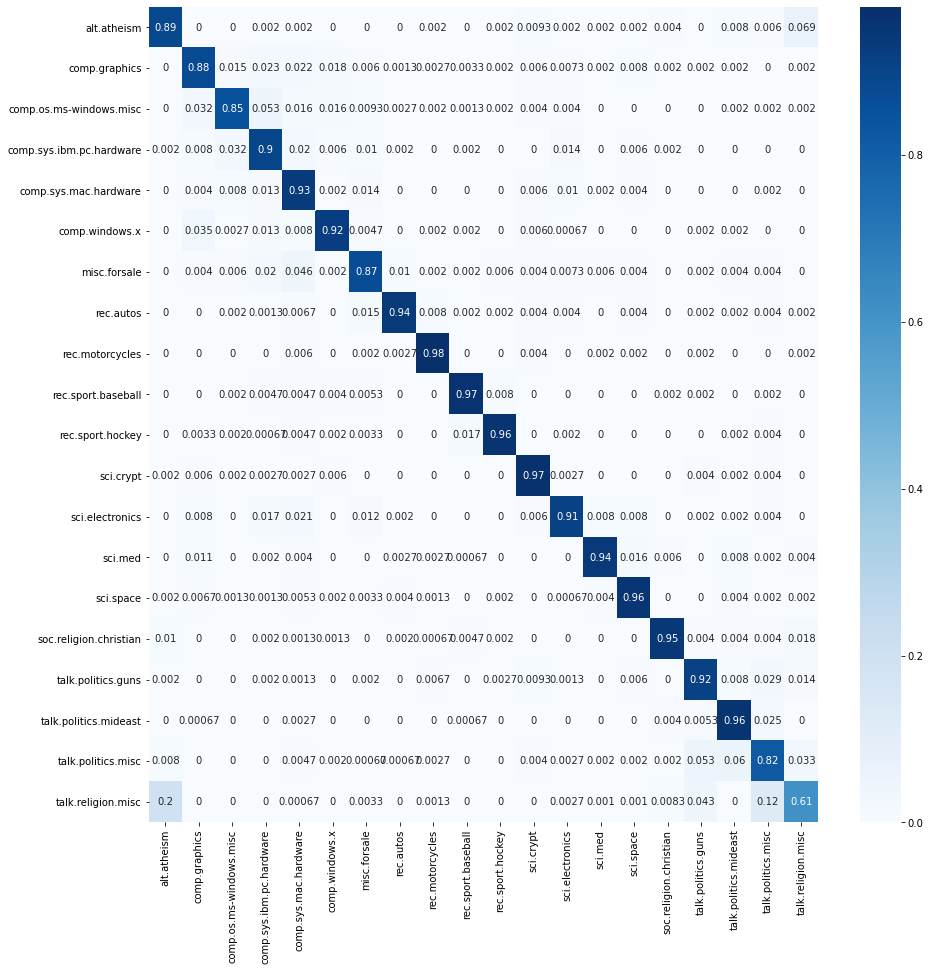

In [19]:
#Creats confusion matrix visual
labels = df.Target.unique()

plt.figure(figsize=(15, 15))
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_norm, annot=True, cmap='Blues', xticklabels = labels, yticklabels = labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')


## Pairwise comparison

Pairs choosen using the confusion matrix above. I selected 2 pairs with high false positive rates

alt.altheism & talk.religion.misc

talk.politics.mideast & talk.religion.misc





## Vectorize the text

### Alt.atheism and talk.religion.misc

Accuracy:  0.8244444444444444


array([[0.92066667, 0.07933333],
       [0.22366667, 0.77633333]])

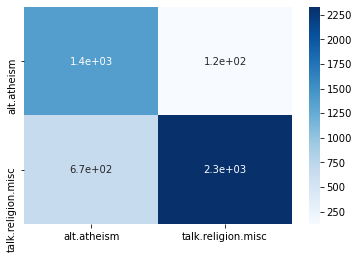

In [20]:
#Filter original df to only include the two labels

df_alt_comp = df[(df["Target"] == "alt.atheism") | (df['Target'] == "talk.religion.misc")].reset_index(drop = True)
#df_alt_comp

X_train, X_test, y_train, y_test = train_test_split(df_alt_comp['final_text'], df_alt_comp['Target'], test_size=0.5, random_state=1, stratify=df_alt_comp['Target'])


#Vecotize the data
vectorizer = TfidfVectorizer(min_df=5, max_df=0.4)

tfidf_matrix = vectorizer.fit(X_train)

X_train_tfidf = tfidf_matrix.transform(X_train)

X_test_tfidf = tfidf_matrix.transform(X_test)


#Initialze Model
model = GaussianNB()

#Train Model
model.fit(X_train_tfidf.toarray(), y_train)

#Predict on test set
y_pred = model.predict(X_test_tfidf.toarray())


#Results
print("Accuracy: ", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

labels = df_alt_comp.Target.unique()
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels = labels, yticklabels = labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

cm_norm

## talk.politics.mideast & talk.religion.misc

Accuracy:  0.9875555555555555


array([[0.988     , 0.012     ],
       [0.01266667, 0.98733333]])

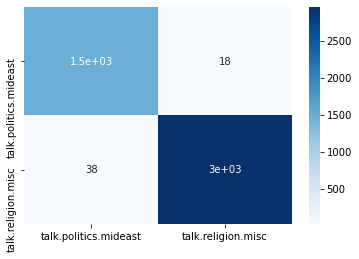

In [21]:
df_alt_comp = df[(df["Target"] == "talk.politics.mideast") | (df['Target'] == "talk.religion.misc")].reset_index(drop = True)
#df_alt_comp

X_train, X_test, y_train, y_test = train_test_split(df_alt_comp['final_text'], df_alt_comp['Target'], test_size=0.5, random_state=1, stratify=df_alt_comp['Target'])


#Vecotize the data
vectorizer = TfidfVectorizer(min_df=5, max_df=0.4)

tfidf_matrix = vectorizer.fit(X_train)

X_train_tfidf = tfidf_matrix.transform(X_train)

X_test_tfidf = tfidf_matrix.transform(X_test)


#Initialze Model
model = GaussianNB()

#Train Model
model.fit(X_train_tfidf.toarray(), y_train)

#Predict on test set
y_pred = model.predict(X_test_tfidf.toarray())


#Results
print("Accuracy: ", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

labels = df_alt_comp.Target.unique()
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels = labels, yticklabels = labels)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

cm_norm

## Triclass comparison

### talk.religion.misc & talk.politics.mideast & alt.atheism

Accuracy:  0.8655


array([[0.91266667, 0.006     , 0.08133333],
       [0.00666667, 0.98533333, 0.008     ],
       [0.21466667, 0.00333333, 0.782     ]])

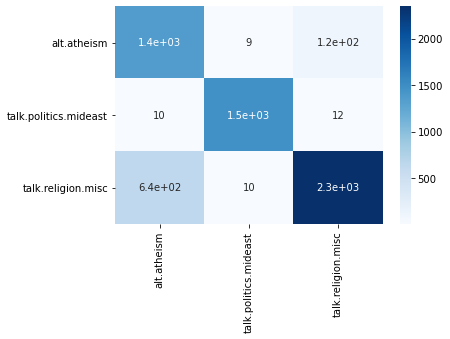

In [22]:
df_alt_comp = df[(df["Target"] == "talk.politics.mideast") | (df['Target'] == "talk.religion.misc") | (df['Target'] == "alt.atheism")].reset_index(drop = True)
#df_alt_comp

X_train, X_test, y_train, y_test = train_test_split(df_alt_comp['final_text'], df_alt_comp['Target'], test_size=0.5, random_state=1, stratify=df_alt_comp['Target'])


#Vecotize the data
vectorizer = TfidfVectorizer(min_df=5, max_df=0.4)

tfidf_matrix = vectorizer.fit(X_train)

X_train_tfidf = tfidf_matrix.transform(X_train)

X_test_tfidf = tfidf_matrix.transform(X_test)


#Initialze Model
model = GaussianNB()

#Train Model
model.fit(X_train_tfidf.toarray(), y_train)

#Predict on test set
y_pred = model.predict(X_test_tfidf.toarray())


#Results
print("Accuracy: ", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

labels = df_alt_comp.Target.unique()
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels = labels, yticklabels = labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

cm_norm

### rec.sport.hockey & rec.sport.baseball & rec.autos

Accuracy:  0.9797777777777777


array([[0.992     , 0.004     , 0.004     ],
       [0.01266667, 0.97533333, 0.012     ],
       [0.00933333, 0.01866667, 0.972     ]])

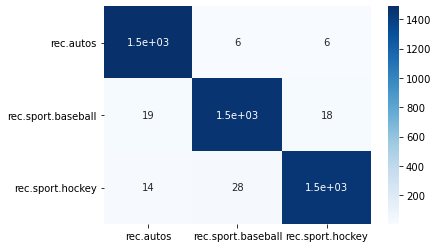

In [23]:
df_alt_comp = df[(df["Target"] == "rec.sport.hockey") | (df['Target'] == "rec.sport.baseball") | (df['Target'] == "rec.autos")].reset_index(drop = True)
#df_alt_comp

X_train, X_test, y_train, y_test = train_test_split(df_alt_comp['final_text'], df_alt_comp['Target'], test_size=0.5, random_state=1, stratify=df_alt_comp['Target'])


#Vecotize the data
vectorizer = TfidfVectorizer(min_df=5, max_df=0.4)

tfidf_matrix = vectorizer.fit(X_train)

X_train_tfidf = tfidf_matrix.transform(X_train)

X_test_tfidf = tfidf_matrix.transform(X_test)


#Initialze Model
model = GaussianNB()

#Train Model
model.fit(X_train_tfidf.toarray(), y_train)

#Predict on test set
y_pred = model.predict(X_test_tfidf.toarray())


#Results
print("Accuracy: ", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

labels = df_alt_comp.Target.unique()
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels = labels, yticklabels = labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

cm_norm

### misc.forsale & sci.electronics & comp.sys.mac.hardware

Accuracy:  0.9128888888888889


array([[0.95266667, 0.026     , 0.02133333],
       [0.07733333, 0.894     , 0.02866667],
       [0.06733333, 0.04066667, 0.892     ]])

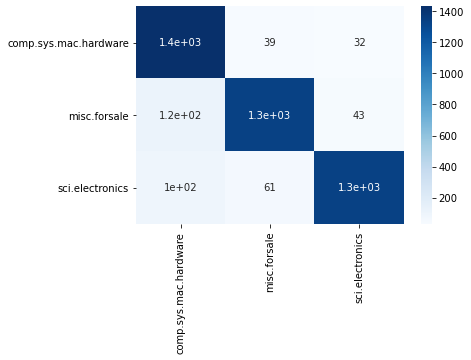

In [24]:
df_alt_comp = df[(df["Target"] == "misc.forsale") | (df['Target'] == "sci.electronics") | (df['Target'] == "comp.sys.mac.hardware")].reset_index(drop = True)
#df_alt_comp

X_train, X_test, y_train, y_test = train_test_split(df_alt_comp['final_text'], df_alt_comp['Target'], test_size=0.5, random_state=1, stratify=df_alt_comp['Target'])


#Vecotize the data
vectorizer = TfidfVectorizer(min_df=5, max_df=0.4)

tfidf_matrix = vectorizer.fit(X_train)

X_train_tfidf = tfidf_matrix.transform(X_train)

X_test_tfidf = tfidf_matrix.transform(X_test)


#Initialze Model
model = GaussianNB()

#Train Model
model.fit(X_train_tfidf.toarray(), y_train)

#Predict on test set
y_pred = model.predict(X_test_tfidf.toarray())


#Results
print("Accuracy: ", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

labels = df_alt_comp.Target.unique()
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels = labels, yticklabels = labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

cm_norm

### comp.sys.ibm.pc.hardware & comp.sys.mac.hardware & comp.windows.x

Accuracy:  0.9384444444444444


array([[0.91      , 0.072     , 0.018     ],
       [0.03133333, 0.95066667, 0.018     ],
       [0.02066667, 0.02466667, 0.95466667]])

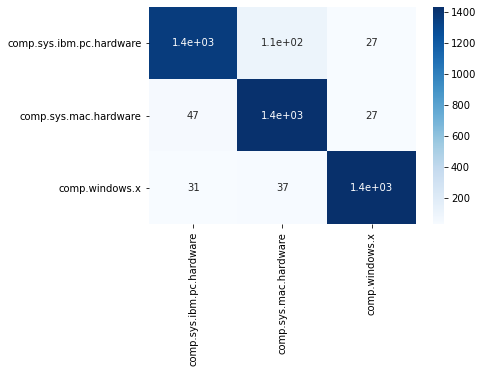

In [25]:
df_alt_comp = df[(df["Target"] == "comp.sys.ibm.pc.hardware") | (df['Target'] == "comp.sys.mac.hardware") | (df['Target'] == "comp.windows.x")].reset_index(drop = True)
#df_alt_comp

X_train, X_test, y_train, y_test = train_test_split(df_alt_comp['final_text'], df_alt_comp['Target'], test_size=0.5, random_state=1, stratify=df_alt_comp['Target'])


#Vecotize the data
vectorizer = TfidfVectorizer(min_df=5, max_df=0.4)

tfidf_matrix = vectorizer.fit(X_train)

X_train_tfidf = tfidf_matrix.transform(X_train)

X_test_tfidf = tfidf_matrix.transform(X_test)


#Initialze Model
model = GaussianNB()

#Train Model
model.fit(X_train_tfidf.toarray(), y_train)

#Predict on test set
y_pred = model.predict(X_test_tfidf.toarray())


#Results
print("Accuracy: ", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

labels = df_alt_comp.Target.unique()
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels = labels, yticklabels = labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

cm_norm

### soc.religion.christian & alt.atheism & talk.religion.misc

Accuracy:  0.8457304869913276


array([[0.91333333, 0.01133333, 0.07533333],
       [0.0040107 , 0.94986631, 0.04612299],
       [0.21533333, 0.02466667, 0.76      ]])

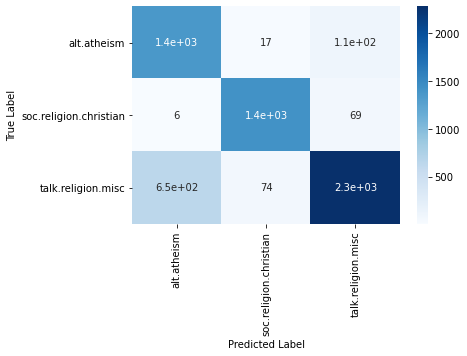

In [29]:
df_alt_comp = df[(df["Target"] == "soc.religion.christian") | (df['Target'] == "alt.atheism") | (df['Target'] == "talk.religion.misc")].reset_index(drop = True)
#df_alt_comp

X_train, X_test, y_train, y_test = train_test_split(df_alt_comp['final_text'], df_alt_comp['Target'], test_size=0.5, random_state=1, stratify=df_alt_comp['Target'])


#Vecotize the data
vectorizer = TfidfVectorizer(min_df=5, max_df=0.4)

tfidf_matrix = vectorizer.fit(X_train)

X_train_tfidf = tfidf_matrix.transform(X_train)

X_test_tfidf = tfidf_matrix.transform(X_test)


#Initialze Model
model = GaussianNB()

#Train Model
model.fit(X_train_tfidf.toarray(), y_train)

#Predict on test set
y_pred = model.predict(X_test_tfidf.toarray())


#Results
print("Accuracy: ", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

labels = df_alt_comp.Target.unique()
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


sns.heatmap(cm, annot=True, cmap='Blues', xticklabels = labels, yticklabels = labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

cm_norm